In [2]:

# NumPy for numerical computing
import numpy as np

# Pandas for DataFrames
import pandas as pd

pd.set_option("display.max_columns", 100)

# Matplotlib for visualization
from matplotlib import pyplot as plt

# display plots in the notebook
%matplotlib inline

# Seaborn for easier visualization
import seaborn as sns

sns.set_style("darkgrid")

# (Optional) Suppress FutureWarning
import warnings

warnings.simplefilter(action="ignore", category=FutureWarning)

In [3]:
# Load employee data from CSV
df = pd.read_csv("employee_data.csv")
df.head()


,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
0,221,engineering,NaN,0.932868,4,NaN,low,0.829896,Left,5.0
1,232,support,NaN,NaN,3,NaN,low,0.834544,Employed,2.0
2,184,sales,NaN,0.788830,3,NaN,medium,0.834988,Employed,3.0
3,206,sales,NaN,0.575688,4,NaN,low,0.424764,Employed,2.0
4,249,sales,NaN,0.845217,3,NaN,low,0.779043,Employed,3.0


In [4]:
# Drop duplicates
df.drop_duplicates(inplace=True)
print(df.shape)

(14221, 10)


In [5]:
# Drop temporary workers
df = df[df.department != "temp"]
print(df.shape)

(14068, 10)


## Handle missing data

In [6]:
# Display number of missing values by feature
df.isnull().sum()

avg_monthly_hrs          0
department             709
filed_complaint      12043
last_evaluation       1351
n_projects               0
recently_promoted    13768
salary                   0
satisfaction             0
status                   0
tenure                   0
dtype: int64

In [8]:
# Fill missing values in department with 'Missing'
df["department"].fillna("Missing", inplace=True)


In [9]:
# Missing filed_complaint values should be 0
df.filed_complaint.fillna(0, inplace=True)

# Missing recently_promoted values should be 0
df.recently_promoted.fillna(0, inplace=True)

# Print unique values of 'filed_complaint'
print(df.filed_complaint.unique())

# Print unique values of 'recently_promoted'
print(df.recently_promoted.unique())

[0. 1.]
[0. 1.]


In [10]:
# Indicator variable for missing last_evaluation
df["last_evaluation_missing"] = df.last_evaluation.isnull().astype(int)

In [11]:
# Fill missing values in last_evaluation with 0
df.last_evaluation.fillna(0, inplace=True)

In [12]:
# Display number of missing values by feature
df.isnull().sum()

avg_monthly_hrs            0
department                 0
filed_complaint            0
last_evaluation            0
n_projects                 0
recently_promoted          0
salary                     0
satisfaction               0
status                     0
tenure                     0
last_evaluation_missing    0
dtype: int64

## Engineer Features

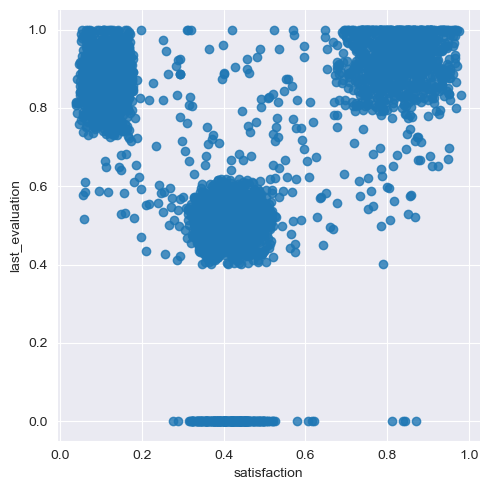

In [13]:
# Scatterplot of satisfaction vs. last_evaluation, only those who have left
sns.lmplot(
    x="satisfaction", y="last_evaluation", data=df[df.status == "Left"], fit_reg=False
)
plt.show()

In [16]:
# Create dummy features
df["underperformer"] = (
    (df.last_evaluation < 0.6) & (df.last_evaluation_missing == 0)
).astype(int)

df["unhappy"] = (df.satisfaction < 0.2).astype(int)

df["overachiever"] = ((df.last_evaluation > 0.8) & (df.satisfaction > 0.7)).astype(int)

In [17]:
df.head()
# The proportion of observations belonging to each group
df[["underperformer", "unhappy", "overachiever"]].mean()

underperformer    0.285257
unhappy           0.092195
overachiever      0.177069
dtype: float64

## Save the ABT

In [18]:
# Convert status to an indicator variable
df["status"] = pd.get_dummies(df.status).Left

In [19]:
# The proportion of observations who 'Left'
df.status.mean()

0.23933750355416547

In [20]:
# Create new dataframe with dummy features
df = pd.get_dummies(df, columns=["department", "salary"])

# Display first 10 rows
df.head(10)

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,status,tenure,last_evaluation_missing,underperformer,unhappy,overachiever,department_IT,department_Missing,department_admin,department_engineering,department_finance,department_information_technology,department_management,department_marketing,department_procurement,department_product,department_sales,department_support,salary_high,salary_low,salary_medium
0,221,0.0,0.932868,4,0.0,0.829896,True,5.0,0,0,0,1,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False
1,232,0.0,0.000000,3,0.0,0.834544,False,2.0,1,0,0,0,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False
2,184,0.0,0.788830,3,0.0,0.834988,False,3.0,0,0,0,0,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True
3,206,0.0,0.575688,4,0.0,0.424764,False,2.0,0,1,0,0,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False
4,249,0.0,0.845217,3,0.0,0.779043,False,3.0,0,0,0,1,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False
5,140,0.0,0.589097,4,0.0,0.660020,False,4.0,0,1,0,0,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True
6,121,1.0,0.625399,3,0.0,0.835571,False,3.0,0,0,0,0,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False
7,150,0.0,0.644586,4,0.0,0.796683,False,3.0,0,0,0,0,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False
8,215,1.0,0.524114,3,0.0,0.715005,False,7.0,0,1,0,0,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True
9,269,0.0,0.909364,5,0.0,0.994037,False,2.0,0,0,0,1,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True


In [21]:
# Save analytical base table
df.to_csv("analytical_base_table.csv", index=None)
